In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv("full_dialog.csv")
full_info = pd.read_csv("full_info.csv")

In [3]:
anno_info = pd.read_csv("300_info.csv")
anno_data = pd.read_csv("300_dialog.csv",encoding = 'latin1')

In [4]:
full_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   B2                2034 non-null   object 
 1   B3                2034 non-null   object 
 2   B4                2034 non-null   int64  
 3   B6                2034 non-null   float64
 4   B7                2034 non-null   int64  
 5   extrovert.x       2027 non-null   float64
 6   agreeable.x       2027 non-null   float64
 7   conscientious.x   2027 non-null   float64
 8   neurotic.x        2027 non-null   float64
 9   open.x            2027 non-null   float64
 10  care.x            2027 non-null   float64
 11  fairness.x        2027 non-null   float64
 12  loyalty.x         2027 non-null   float64
 13  authority.x       2027 non-null   float64
 14  purity.x          2027 non-null   float64
 15  freedom.x         2027 non-null   float64
 16  conform.x         2027 non-null   float64


In [5]:
anno_data.shape

(10864, 12)

In [6]:
full_data.head()

,Unnamed: 0,Unit,Turn,B4,B2
0,0,Good morning. How are you doing today?,0,0,20180904-045349_715_live
1,1,Hi. I am doing good. How about you?,0,1,20180904-045349_715_live
2,2,I'm doing pretty good for a Tuesday morning.,1,0,20180904-045349_715_live
3,3,"Haha. Same here, but it really feels like a Mo...",1,1,20180904-045349_715_live
4,4,Ugh yes it does!,2,0,20180904-045349_715_live


In [7]:
full_data['B4'].value_counts()

0    10600
1    10332
Name: B4, dtype: int64

In [8]:
full_info.head(15)

,B2,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
0,20180904-045349_715_live,user_585,0,0.00,11,3.2,3.2,3.6,1.6,3.6,...,2.0,34.0,Male,White,Less than four-year college,Unmarried,Employed for wages,5.0,Other religion,Liberal
1,20180904-045349_715_live,user_1810,1,0.00,11,3.2,4.0,3.8,2.0,3.2,...,4.0,50.0,Female,White,Less than four-year college,Married,Employed for wages,10.0,Protestant,Conservative
2,20180904-154250_98_live,user_1776,0,0.00,10,3.6,3.8,4.0,4.0,3.6,...,4.0,25.0,Female,White,Four-year college,Married,Other,6.0,Atheist,Moderate
3,20180904-154250_98_live,user_2234,1,2.00,10,3.0,3.6,3.2,3.0,3.0,...,2.0,30.0,Male,White,Less than four-year college,Unmarried,Employed for wages,2.0,Atheist,Liberal
4,20180904-024226_703_live,user_198,0,0.05,10,1.0,5.0,2.8,1.0,4.6,...,1.0,36.0,Female,White,Less than four-year college,Unmarried,Employed for wages,1.0,Catholic,Moderate
5,20180904-024226_703_live,user_1153,1,0.05,10,2.8,3.4,3.8,3.0,5.0,...,4.5,28.0,Male,White,Less than four-year college,Married,Other,4.0,Atheist,Moderate
6,20180904-100019_870_live,user_2170,0,0.00,11,4.0,5.0,4.6,3.2,4.6,...,3.5,34.0,Female,Other,Less than four-year college,Unmarried,Employed for wages,10.0,Protestant,Moderate
7,20180904-100019_870_live,user_1879,1,0.00,11,3.8,4.8,4.8,1.2,4.4,...,4.0,42.0,Male,White,Four-year college,Married,Employed for wages,9.0,Catholic,Conservative
8,20180904-001208_706_live,user_109,0,0.00,11,3.4,3.0,3.0,3.0,3.0,...,2.0,23.0,Male,Other,Less than four-year college,Unmarried,Other,1.0,Other religion,Liberal
9,20180904-001208_706_live,user_527,1,1.00,11,2.4,3.0,4.2,1.2,3.6,...,4.0,32.0,Male,Other,Less than four-year college,Married,Employed for wages,9.0,Other religion,Moderate


In [9]:
full_info.shape

(2034, 37)

In [10]:
full_info['sex.x'].value_counts()

Female    1028
Male       985
Other        7
Name: sex.x, dtype: int64

In [11]:
full_info['ideology.x'].value_counts()

Liberal         839
Conservative    592
Moderate        589
Name: ideology.x, dtype: int64

In [12]:
full_info['religion.x'].value_counts()

Other religion    817
Protestant        529
Catholic          385
Atheist           289
Name: religion.x, dtype: int64

In [13]:
full_info['marital.x'].value_counts()

Unmarried    1029
Married       991
Name: marital.x, dtype: int64

In [14]:
full_info['race.x'].value_counts()

White    1545
Other     475
Name: race.x, dtype: int64

<AxesSubplot:>

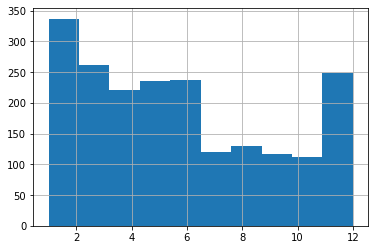

In [15]:
full_info['income.x'].hist()

<AxesSubplot:>

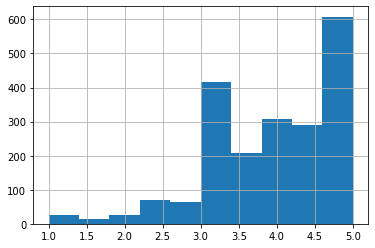

In [16]:
full_info['agreeable.x'].hist()

<AxesSubplot:>

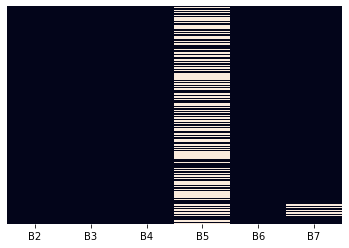

In [17]:
sns.heatmap(anno_info.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:>

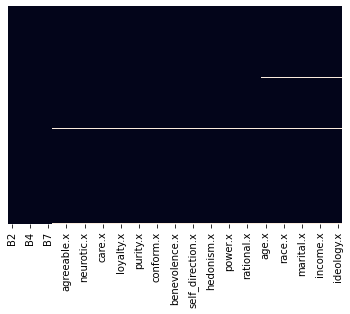

In [18]:
sns.heatmap(full_info.isnull(), yticklabels = False, cbar = False)

In [19]:
anno_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      600 non-null    object 
 1   B3      600 non-null    object 
 2   B4      600 non-null    int64  
 3   B5      257 non-null    float64
 4   B6      600 non-null    float64
 5   B7      581 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 28.2+ KB


In [20]:
full_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   B2                2034 non-null   object 
 1   B3                2034 non-null   object 
 2   B4                2034 non-null   int64  
 3   B6                2034 non-null   float64
 4   B7                2034 non-null   int64  
 5   extrovert.x       2027 non-null   float64
 6   agreeable.x       2027 non-null   float64
 7   conscientious.x   2027 non-null   float64
 8   neurotic.x        2027 non-null   float64
 9   open.x            2027 non-null   float64
 10  care.x            2027 non-null   float64
 11  fairness.x        2027 non-null   float64
 12  loyalty.x         2027 non-null   float64
 13  authority.x       2027 non-null   float64
 14  purity.x          2027 non-null   float64
 15  freedom.x         2027 non-null   float64
 16  conform.x         2027 non-null   float64


In [21]:
full_info['intuitive.x'].mean()

3.139121854958066

<AxesSubplot:>

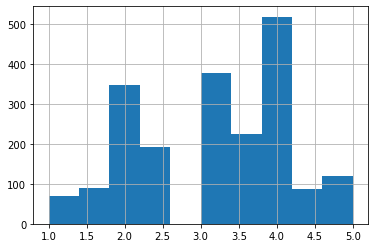

In [22]:
full_info['intuitive.x'].hist()

In [23]:
full_info['B3'].value_counts()

user_858     25
user_527     22
user_1810    19
user_1363    18
user_380     17
             ..
user_1858     1
user_537      1
user_656      1
user_1726     1
user_814      1
Name: B3, Length: 1285, dtype: int64

In [24]:
1285-1017

268

In [25]:
anno_info['B6'].sum()

446.51

In [26]:
anno_info['B5'].sum()

12070.715000000004

In [27]:
full_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   B2                2034 non-null   object 
 1   B3                2034 non-null   object 
 2   B4                2034 non-null   int64  
 3   B6                2034 non-null   float64
 4   B7                2034 non-null   int64  
 5   extrovert.x       2027 non-null   float64
 6   agreeable.x       2027 non-null   float64
 7   conscientious.x   2027 non-null   float64
 8   neurotic.x        2027 non-null   float64
 9   open.x            2027 non-null   float64
 10  care.x            2027 non-null   float64
 11  fairness.x        2027 non-null   float64
 12  loyalty.x         2027 non-null   float64
 13  authority.x       2027 non-null   float64
 14  purity.x          2027 non-null   float64
 15  freedom.x         2027 non-null   float64
 16  conform.x         2027 non-null   float64


In [28]:
#filling the missing values (numerical values with mean, and obejct with mode)
full_info['extrovert.x'] = full_info['extrovert.x'].fillna(full_info['extrovert.x'].mean())
full_info['agreeable.x'] = full_info['agreeable.x'].fillna(full_info['agreeable.x'].mean())
full_info['conscientious.x'] = full_info['conscientious.x'].fillna(full_info['conscientious.x'].mean())
full_info['neurotic.x'] = full_info['neurotic.x'].fillna(full_info['neurotic.x'].mean())
full_info['open.x'] = full_info['open.x'].fillna(full_info['open.x'].mean())
full_info['care.x'] = full_info['care.x'].fillna(full_info['care.x'].mean())
full_info['fairness.x'] = full_info['fairness.x'].fillna(full_info['fairness.x'].mean())
full_info['loyalty.x'] = full_info['loyalty.x'].fillna(full_info['loyalty.x'].mean())
full_info['authority.x'] = full_info['authority.x'].fillna(full_info['authority.x'].mean())
full_info['purity.x'] = full_info['purity.x'].fillna(full_info['purity.x'].mean())
full_info['freedom.x'] = full_info['freedom.x'].fillna(full_info['freedom.x'].mean())
full_info['conform.x'] = full_info['conform.x'].fillna(full_info['conform.x'].mean())
full_info['tradition.x'] = full_info['tradition.x'].fillna(full_info['tradition.x'].mean())
full_info['benevolence.x'] = full_info['benevolence.x'].fillna(full_info['benevolence.x'].mean())
full_info['universalism.x'] = full_info['universalism.x'].fillna(full_info['universalism.x'].mean())
full_info['self_direction.x'] = full_info['self_direction.x'].fillna(full_info['self_direction.x'].mean())
full_info['stimulation.x'] = full_info['stimulation.x'].fillna(full_info['stimulation.x'].mean())
full_info['hedonism.x'] = full_info['hedonism.x'].fillna(full_info['hedonism.x'].mean())
full_info['achievement.x'] = full_info['achievement.x'].fillna(full_info['achievement.x'].mean())
full_info['power.x'] = full_info['power.x'].fillna(full_info['power.x'].mean())
full_info['security.x'] = full_info['security.x'].fillna(full_info['security.x'].mean())
full_info['rational.x'] = full_info['rational.x'].fillna(full_info['rational.x'].mean())
full_info['intuitive.x'] = full_info['intuitive.x'].fillna(full_info['intuitive.x'].mean())
full_info['age.x'] = full_info['age.x'].fillna(full_info['age.x'].mean())
full_info['sex.x'] = full_info['sex.x'].fillna(full_info['sex.x'].mode()[0])
full_info['race.x'] = full_info['race.x'].fillna(full_info['race.x'].mode()[0])
full_info['edu.x'] = full_info['edu.x'].fillna(full_info['edu.x'].mode()[0])
full_info['marital.x'] = full_info['marital.x'].fillna(full_info['marital.x'].mode()[0])
full_info['employment.x'] = full_info['employment.x'].fillna(full_info['employment.x'].mode()[0])
full_info['income.x'] = full_info['income.x'].fillna(full_info['income.x'].mean())
full_info['religion.x'] = full_info['religion.x'].fillna(full_info['religion.x'].mode()[0])
full_info['ideology.x'] = full_info['ideology.x'].fillna(full_info['ideology.x'].mode()[0])

In [29]:
full_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   B2                2034 non-null   object 
 1   B3                2034 non-null   object 
 2   B4                2034 non-null   int64  
 3   B6                2034 non-null   float64
 4   B7                2034 non-null   int64  
 5   extrovert.x       2034 non-null   float64
 6   agreeable.x       2034 non-null   float64
 7   conscientious.x   2034 non-null   float64
 8   neurotic.x        2034 non-null   float64
 9   open.x            2034 non-null   float64
 10  care.x            2034 non-null   float64
 11  fairness.x        2034 non-null   float64
 12  loyalty.x         2034 non-null   float64
 13  authority.x       2034 non-null   float64
 14  purity.x          2034 non-null   float64
 15  freedom.x         2034 non-null   float64
 16  conform.x         2034 non-null   float64


In [30]:
#dividing the data into persuader and persuadee
persuader_info = full_info[full_info['B4'] == 0].copy()
persuadee_info = full_info[full_info['B4'] == 1].copy()

In [31]:
persuader_info.head(10)

,B2,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
0,20180904-045349_715_live,user_585,0,0.00,11,3.2,3.2,3.6,1.6,3.6,...,2.0,34.0,Male,White,Less than four-year college,Unmarried,Employed for wages,5.0,Other religion,Liberal
2,20180904-154250_98_live,user_1776,0,0.00,10,3.6,3.8,4.0,4.0,3.6,...,4.0,25.0,Female,White,Four-year college,Married,Other,6.0,Atheist,Moderate
4,20180904-024226_703_live,user_198,0,0.05,10,1.0,5.0,2.8,1.0,4.6,...,1.0,36.0,Female,White,Less than four-year college,Unmarried,Employed for wages,1.0,Catholic,Moderate
6,20180904-100019_870_live,user_2170,0,0.00,11,4.0,5.0,4.6,3.2,4.6,...,3.5,34.0,Female,Other,Less than four-year college,Unmarried,Employed for wages,10.0,Protestant,Moderate
8,20180904-001208_706_live,user_109,0,0.00,11,3.4,3.0,3.0,3.0,3.0,...,2.0,23.0,Male,Other,Less than four-year college,Unmarried,Other,1.0,Other religion,Liberal
10,20180904-073734_888_live,user_1237,0,1.00,10,3.8,5.0,5.0,3.6,4.8,...,3.5,30.0,Female,White,Four-year college,Married,Employed for wages,12.0,Protestant,Moderate
12,20180904-133536_2_live,user_1171,0,0.00,10,3.0,3.0,3.0,3.0,3.0,...,3.0,28.0,Male,Other,Less than four-year college,Unmarried,Other,5.0,Protestant,Moderate
14,20180904-151909_144_live,user_585,0,0.50,10,3.2,3.2,3.6,1.6,3.6,...,2.0,34.0,Male,White,Less than four-year college,Unmarried,Employed for wages,5.0,Other religion,Liberal
16,20180904-090422_355_live,user_338,0,0.50,10,2.4,4.4,4.2,4.4,4.0,...,3.5,21.0,Other,White,Less than four-year college,Unmarried,Other,8.0,Other religion,Liberal
18,20180904-054911_684_live,user_1891,0,0.00,10,3.0,3.0,3.8,3.2,3.0,...,2.5,33.0,Male,White,Less than four-year college,Married,Employed for wages,5.0,Catholic,Moderate


In [32]:
persuadee_info.head(10)

,B2,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
1,20180904-045349_715_live,user_1810,1,0.00,11,3.2,4.0,3.8,2.0,3.2,...,4.0,50.0,Female,White,Less than four-year college,Married,Employed for wages,10.0,Protestant,Conservative
3,20180904-154250_98_live,user_2234,1,2.00,10,3.0,3.6,3.2,3.0,3.0,...,2.0,30.0,Male,White,Less than four-year college,Unmarried,Employed for wages,2.0,Atheist,Liberal
5,20180904-024226_703_live,user_1153,1,0.05,10,2.8,3.4,3.8,3.0,5.0,...,4.5,28.0,Male,White,Less than four-year college,Married,Other,4.0,Atheist,Moderate
7,20180904-100019_870_live,user_1879,1,0.00,11,3.8,4.8,4.8,1.2,4.4,...,4.0,42.0,Male,White,Four-year college,Married,Employed for wages,9.0,Catholic,Conservative
9,20180904-001208_706_live,user_527,1,1.00,11,2.4,3.0,4.2,1.2,3.6,...,4.0,32.0,Male,Other,Less than four-year college,Married,Employed for wages,9.0,Other religion,Moderate
11,20180904-073734_888_live,user_1833,1,0.00,10,4.0,3.0,3.6,2.6,3.2,...,2.0,35.0,Female,White,Less than four-year college,Unmarried,Employed for wages,4.0,Catholic,Moderate
13,20180904-133536_2_live,user_1519,1,0.15,10,3.0,4.6,4.6,1.2,4.0,...,5.0,50.0,Male,Other,Four-year college,Married,Employed for wages,8.0,Protestant,Conservative
15,20180904-151909_144_live,user_380,1,0.10,10,3.8,4.4,4.4,1.2,3.8,...,2.0,31.0,Male,White,Postgraduate,Married,Employed for wages,5.0,Catholic,Liberal
17,20180904-090422_355_live,user_66,1,1.00,10,2.0,4.8,5.0,1.4,3.4,...,4.0,50.0,Female,White,Less than four-year college,Unmarried,Other,3.0,Protestant,Moderate
19,20180904-054911_684_live,user_2009,1,0.10,10,2.2,4.8,3.8,3.0,5.0,...,3.0,37.0,Female,White,Less than four-year college,Unmarried,Employed for wages,4.0,Other religion,Liberal


In [33]:
persuadee_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 1 to 2033
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   B2                1017 non-null   object 
 1   B3                1017 non-null   object 
 2   B4                1017 non-null   int64  
 3   B6                1017 non-null   float64
 4   B7                1017 non-null   int64  
 5   extrovert.x       1017 non-null   float64
 6   agreeable.x       1017 non-null   float64
 7   conscientious.x   1017 non-null   float64
 8   neurotic.x        1017 non-null   float64
 9   open.x            1017 non-null   float64
 10  care.x            1017 non-null   float64
 11  fairness.x        1017 non-null   float64
 12  loyalty.x         1017 non-null   float64
 13  authority.x       1017 non-null   float64
 14  purity.x          1017 non-null   float64
 15  freedom.x         1017 non-null   float64
 16  conform.x         1017 non-null   float64


In [34]:
persuader_info = persuader_info.drop(['B2'], axis = 1) 

In [35]:
persuader_info.head()

,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,care.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
0,user_585,0,0.00,11,3.2,3.2,3.6,1.6,3.6,3.4,...,2.0,34.0,Male,White,Less than four-year college,Unmarried,Employed for wages,5.0,Other religion,Liberal
2,user_1776,0,0.00,10,3.6,3.8,4.0,4.0,3.6,4.0,...,4.0,25.0,Female,White,Four-year college,Married,Other,6.0,Atheist,Moderate
4,user_198,0,0.05,10,1.0,5.0,2.8,1.0,4.6,5.6,...,1.0,36.0,Female,White,Less than four-year college,Unmarried,Employed for wages,1.0,Catholic,Moderate
6,user_2170,0,0.00,11,4.0,5.0,4.6,3.2,4.6,5.4,...,3.5,34.0,Female,Other,Less than four-year college,Unmarried,Employed for wages,10.0,Protestant,Moderate
8,user_109,0,0.00,11,3.4,3.0,3.0,3.0,3.0,4.0,...,2.0,23.0,Male,Other,Less than four-year college,Unmarried,Other,1.0,Other religion,Liberal


In [36]:
persuader_info.head()

,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,care.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
0,user_585,0,0.00,11,3.2,3.2,3.6,1.6,3.6,3.4,...,2.0,34.0,Male,White,Less than four-year college,Unmarried,Employed for wages,5.0,Other religion,Liberal
2,user_1776,0,0.00,10,3.6,3.8,4.0,4.0,3.6,4.0,...,4.0,25.0,Female,White,Four-year college,Married,Other,6.0,Atheist,Moderate
4,user_198,0,0.05,10,1.0,5.0,2.8,1.0,4.6,5.6,...,1.0,36.0,Female,White,Less than four-year college,Unmarried,Employed for wages,1.0,Catholic,Moderate
6,user_2170,0,0.00,11,4.0,5.0,4.6,3.2,4.6,5.4,...,3.5,34.0,Female,Other,Less than four-year college,Unmarried,Employed for wages,10.0,Protestant,Moderate
8,user_109,0,0.00,11,3.4,3.0,3.0,3.0,3.0,4.0,...,2.0,23.0,Male,Other,Less than four-year college,Unmarried,Other,1.0,Other religion,Liberal


In [37]:
len(persuader_info.index)

1017

In [38]:
persuader_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 2032
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   B3                1017 non-null   object 
 1   B4                1017 non-null   int64  
 2   B6                1017 non-null   float64
 3   B7                1017 non-null   int64  
 4   extrovert.x       1017 non-null   float64
 5   agreeable.x       1017 non-null   float64
 6   conscientious.x   1017 non-null   float64
 7   neurotic.x        1017 non-null   float64
 8   open.x            1017 non-null   float64
 9   care.x            1017 non-null   float64
 10  fairness.x        1017 non-null   float64
 11  loyalty.x         1017 non-null   float64
 12  authority.x       1017 non-null   float64
 13  purity.x          1017 non-null   float64
 14  freedom.x         1017 non-null   float64
 15  conform.x         1017 non-null   float64
 16  tradition.x       1017 non-null   float64


In [39]:
persuader_copy = persuader_info.copy()

In [40]:
len((persuader_info.sort_values("B3"))['B3'])

1017

In [41]:
len

<function len(obj, /)>

In [42]:
len(persuader_info["B3"].unique())

701

In [43]:
persuader_info.head()

,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,care.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
0,user_585,0,0.00,11,3.2,3.2,3.6,1.6,3.6,3.4,...,2.0,34.0,Male,White,Less than four-year college,Unmarried,Employed for wages,5.0,Other religion,Liberal
2,user_1776,0,0.00,10,3.6,3.8,4.0,4.0,3.6,4.0,...,4.0,25.0,Female,White,Four-year college,Married,Other,6.0,Atheist,Moderate
4,user_198,0,0.05,10,1.0,5.0,2.8,1.0,4.6,5.6,...,1.0,36.0,Female,White,Less than four-year college,Unmarried,Employed for wages,1.0,Catholic,Moderate
6,user_2170,0,0.00,11,4.0,5.0,4.6,3.2,4.6,5.4,...,3.5,34.0,Female,Other,Less than four-year college,Unmarried,Employed for wages,10.0,Protestant,Moderate
8,user_109,0,0.00,11,3.4,3.0,3.0,3.0,3.0,4.0,...,2.0,23.0,Male,Other,Less than four-year college,Unmarried,Other,1.0,Other religion,Liberal


In [44]:
def donation_sum(df):
    global df_
    df1 = df.copy()
    column1 = ['B3','B4', 'B6', 'B7', 'extrovert.x', 'agreeable.x', 'conscientious.x',
       'neurotic.x', 'open.x', 'care.x', 'fairness.x', 'loyalty.x',
       'authority.x', 'purity.x', 'freedom.x', 'conform.x', 'tradition.x',
       'benevolence.x', 'universalism.x', 'self_direction.x', 'stimulation.x',
       'hedonism.x', 'achievement.x', 'power.x', 'security.x', 'rational.x',
       'intuitive.x', 'age.x', 'sex.x', 'race.x', 'edu.x', 'marital.x',
       'employment.x', 'income.x', 'religion.x', 'ideology.x']
    df_final = pd.DataFrame(index=range(701),columns = column1)
    df_sorted = df1.sort_values(by = 'B3', ascending = False).reset_index().drop(['index'], axis = 1).copy()
    i = 0
    j = 0
    k = 0
    columns2 = ['B3','B4', 'extrovert.x', 'agreeable.x', 'conscientious.x',
       'neurotic.x', 'open.x', 'care.x', 'fairness.x', 'loyalty.x',
       'authority.x', 'purity.x', 'freedom.x', 'conform.x', 'tradition.x',
       'benevolence.x', 'universalism.x', 'self_direction.x', 'stimulation.x',
       'hedonism.x', 'achievement.x', 'power.x', 'security.x', 'rational.x',
       'intuitive.x', 'age.x', 'sex.x', 'race.x', 'edu.x', 'marital.x',
       'employment.x', 'income.x', 'religion.x', 'ideology.x']
    for i in range(0, (len(df_sorted["B3"]))):
        sum1 = df_sorted["B6"][i]
        mean = df_sorted["B7"][i]
        j = i + 1
        if(i != 1016):
            if ((df_sorted["B3"][i] != df_sorted["B3"][j])):
                for column in columns2:
                    df_final[column][k] = df_sorted[column][i]
                df_final["B6"][k] = sum1
                df_final["B7"][k] = mean
                k = k + 1
        elif(i == 1016):
            for column in columns2:
                df_final[column][k] = df_sorted[column][i]
            df_final["B6"][k] = sum1
            df_final["B7"][k] = mean
        elif((i != 0) and (df_sorted["B3"][i] != df_sorted["B3"][i-1])):
            while(df_sorted["B3"][j] == df_sorted["B3"][i]):
                   sum1 = sum1 + df_sorted["B6"][j]
                   mean = (mean*j + df_sorted["B7"][j])/(j+1)
                   j = j+1
    return df_final

In [45]:
persuader_final = donation_sum(persuader_info)

In [46]:
persuader_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   B3                701 non-null    object
 1   B4                701 non-null    object
 2   B6                701 non-null    object
 3   B7                701 non-null    object
 4   extrovert.x       701 non-null    object
 5   agreeable.x       701 non-null    object
 6   conscientious.x   701 non-null    object
 7   neurotic.x        701 non-null    object
 8   open.x            701 non-null    object
 9   care.x            701 non-null    object
 10  fairness.x        701 non-null    object
 11  loyalty.x         701 non-null    object
 12  authority.x       701 non-null    object
 13  purity.x          701 non-null    object
 14  freedom.x         701 non-null    object
 15  conform.x         701 non-null    object
 16  tradition.x       701 non-null    object
 17  benevolence.x   

In [47]:
persuader_final.head()

,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,care.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
0,user_994,0,5,11,3.8,4.8,4.2,2.2,3.8,4,...,1.5,38,Male,Other,Less than four-year college,Married,Employed for wages,11,Other religion,Conservative
1,user_987,0,0,10,2.8,4.6,4.4,4,3.8,5.2,...,4,32,Female,Other,Four-year college,Unmarried,Other,4,Protestant,Moderate
2,user_986,0,1,10,2.8,4.2,3.8,1.2,4,3.8,...,4,42,Female,Other,Less than four-year college,Unmarried,Other,3,Other religion,Moderate
3,user_985,0,0,14,4,3.8,4.2,2.2,4.2,3.4,...,3.5,30,Male,White,Four-year college,Unmarried,Employed for wages,5,Other religion,Liberal
4,user_980,0,0.5,12,3.4,4.6,3.8,2.8,3.6,5.8,...,3,64,Female,White,Postgraduate,Unmarried,Other,6,Other religion,Liberal


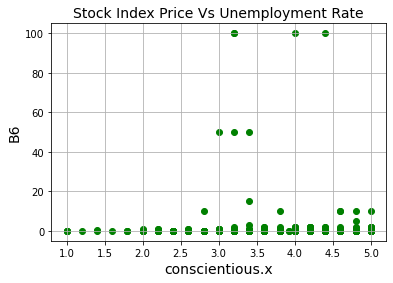

In [48]:
plt.scatter(persuader_final['agreeable.x'], persuader_final['B6'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('conscientious.x', fontsize=14)
plt.ylabel('B6', fontsize=14)
plt.grid(True)
plt.show()

In [49]:
X = persuadee_info[['extrovert.x', 'agreeable.x', 'conscientious.x', 'neurotic.x', 'open.x']]
y = persuadee_info['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 0.73487048 -1.4933904  -0.23428014  0.50452127 -0.39137296]


In [50]:
X = persuader_final[['extrovert.x', 'agreeable.x', 'conscientious.x', 'neurotic.x', 'open.x']]
y = persuader_final['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 0.54813258 -0.33134753 -0.55065643  0.20523319 -0.4141072 ]


In [51]:
X = persuadee_info[['care.x', 'fairness.x', 'loyalty.x', 'authority.x', 'purity.x', 'freedom.x']]
y = persuadee_info['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.73219969  0.21257011  1.80003102 -0.38201083  0.16842105  0.51187577]


In [52]:
X = persuader_final[['care.x', 'fairness.x', 'loyalty.x', 'authority.x', 'purity.x', 'freedom.x']]
y = persuader_final['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 0.08251799 -0.95996642  0.35455181  0.43987906 -0.06426451 -0.11337067]


In [53]:
X = persuadee_info[['conform.x', 'tradition.x',
       'benevolence.x', 'universalism.x', 'self_direction.x', 'stimulation.x',
       'hedonism.x', 'achievement.x', 'power.x', 'security.x']]
y = persuadee_info['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.352632    0.78655811 -0.4875501  -0.03955409  0.32176356 -0.76252771
  0.11649092  0.16023122  0.84811175 -0.38605857]


In [54]:
X = persuader_final[['conform.x', 'tradition.x',
       'benevolence.x', 'universalism.x', 'self_direction.x', 'stimulation.x',
       'hedonism.x', 'achievement.x', 'power.x', 'security.x']]
y = persuader_final['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 0.0147407  -0.06795328 -0.22683262 -0.40120521 -0.15956315  0.20072753
 -0.27479699  0.48213483 -0.39963313  0.05366494]


In [55]:
X = persuader_final[['age.x']]
y = persuader_final['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.03804694]


In [56]:
X = persuadee_info[['age.x']]
y = persuadee_info['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[0.05699212]


In [57]:
X = persuader_final[['income.x']]
y = persuader_final['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.0796192]


In [58]:
X = persuadee_info[['income.x']]
y = persuadee_info['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.3646056]


In [59]:
X = persuader_final[['rational.x', 'intuitive.x']]
y = persuader_final['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-1.243754   -0.29452055]


In [60]:
X = persuadee_info[['rational.x', 'intuitive.x']]
y = persuadee_info['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.09179843 -1.22822515]


In [61]:
persuadee_info = persuadee_info.drop(['B2'], axis = 1)
persuadee_info.head()

,B3,B4,B6,B7,extrovert.x,agreeable.x,conscientious.x,neurotic.x,open.x,care.x,...,intuitive.x,age.x,sex.x,race.x,edu.x,marital.x,employment.x,income.x,religion.x,ideology.x
1,user_1810,1,0.00,11,3.2,4.0,3.8,2.0,3.2,4.0,...,4.0,50.0,Female,White,Less than four-year college,Married,Employed for wages,10.0,Protestant,Conservative
3,user_2234,1,2.00,10,3.0,3.6,3.2,3.0,3.0,3.0,...,2.0,30.0,Male,White,Less than four-year college,Unmarried,Employed for wages,2.0,Atheist,Liberal
5,user_1153,1,0.05,10,2.8,3.4,3.8,3.0,5.0,3.6,...,4.5,28.0,Male,White,Less than four-year college,Married,Other,4.0,Atheist,Moderate
7,user_1879,1,0.00,11,3.8,4.8,4.8,1.2,4.4,6.0,...,4.0,42.0,Male,White,Four-year college,Married,Employed for wages,9.0,Catholic,Conservative
9,user_527,1,1.00,11,2.4,3.0,4.2,1.2,3.6,4.2,...,4.0,32.0,Male,Other,Less than four-year college,Married,Employed for wages,9.0,Other religion,Moderate


In [62]:
total_data = pd.concat([persuader_final, persuadee_info], ignore_index=True, sort=False)

In [63]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   B3                1718 non-null   object
 1   B4                1718 non-null   object
 2   B6                1718 non-null   object
 3   B7                1718 non-null   object
 4   extrovert.x       1718 non-null   object
 5   agreeable.x       1718 non-null   object
 6   conscientious.x   1718 non-null   object
 7   neurotic.x        1718 non-null   object
 8   open.x            1718 non-null   object
 9   care.x            1718 non-null   object
 10  fairness.x        1718 non-null   object
 11  loyalty.x         1718 non-null   object
 12  authority.x       1718 non-null   object
 13  purity.x          1718 non-null   object
 14  freedom.x         1718 non-null   object
 15  conform.x         1718 non-null   object
 16  tradition.x       1718 non-null   object
 17  benevolence.x 

In [64]:
X = total_data[['extrovert.x', 'agreeable.x', 'conscientious.x', 'neurotic.x', 'open.x']]
y = total_data['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 0.65883805 -1.02553897 -0.39120029  0.35344956 -0.46480007]


In [65]:
X = total_data[['care.x', 'fairness.x', 'loyalty.x', 'authority.x', 'purity.x', 'freedom.x']]
y = total_data['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.37891638 -0.2903567   1.23421019 -0.05392284  0.08075498  0.27429194]


In [66]:
X = total_data[['conform.x', 'tradition.x',
       'benevolence.x', 'universalism.x', 'self_direction.x', 'stimulation.x',
       'hedonism.x', 'achievement.x', 'power.x', 'security.x']]
y = total_data['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.19194852  0.45178063 -0.33023124 -0.19851096  0.1262862  -0.36996158
 -0.01976274  0.3454602   0.26353893 -0.2354427 ]


In [67]:
X = total_data[['age.x']]
y = total_data['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[0.017594]


In [68]:
X = total_data[['income.x']]
y = total_data['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.25113505]


In [69]:
X = total_data[['rational.x', 'intuitive.x']]
y = total_data['B6']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.52670648 -0.88407012]


In [70]:
X = total_data[['income.x']]
y = total_data['B6']
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.25113505]


In [71]:
X = persuadee_info[['income.x']]
y = persuadee_info['B6']
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.3646056]


In [72]:
X = persuader_final[['income.x']]
y = persuader_final['B6']
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[-0.0796192]


In [73]:
gender_data = total_data[['B3', 'B6', 'sex.x']] 

In [74]:
gender_data.rename(columns={'sex.x': 'sex'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [75]:
X = gender_data[['sex']]
y = gender_data['B6']

In [76]:
gender_data.head()

,B3,B6,sex
0,user_994,5,Male
1,user_987,0,Female
2,user_986,1,Female
3,user_985,0,Male
4,user_980,0.5,Female


In [80]:
X = pd.get_dummies(data=X, drop_first=True)

In [81]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)
# first Coefficient for male sex and 2nd for sex_Other 

[ 1.00394532 -1.14240388]
